In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 16,
     'axes.labelsize': 22,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
import sklearn

In [2]:
# Função que reordena os dados do MNIST com base no valor das classes (targets), separadamente para treino e teste.
def sort_by_target(mnist):
    # Cria uma lista de tuplas (valor do target, índice) para os 60.000 primeiros exemplos (treinamento),
    # ordena pela classe (target), e extrai os índices ordenados.
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    
    # O mesmo processo é feito para os 10.000 últimos exemplos (teste).
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    
    # Reordena os dados e os rótulos de treino usando os índices ordenados.
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    
    # Reordena os dados e os rótulos de teste usando os índices ordenados (ajustados com +60000 para alinhar com as posições originais).
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

# Importa o dataset MNIST de dígitos manuscritos com 784 features (28x28 pixels) da OpenML via scikit-learn.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# Converte os rótulos (targets) de string para inteiros (int8) para facilitar o processamento.
mnist.target = mnist.target.astype(np.int8)

# Aplica a função para ordenar os dados de treino e teste pelo valor da classe (0 a 9).
sort_by_target(mnist)

# Separa os dados e rótulos de treino.
X_train_raw = mnist.data[:60000]
y_train = mnist.target[:60000]

# Separa os dados e rótulos de teste.
X_test_raw = mnist.data[60000:]
y_test = mnist.target[60000:]

In [3]:
print ( X_train_raw.shape )
print ( X_test_raw.shape )

(60000, 784)
(10000, 784)


In [4]:
idx = 20000
print ( y_train[ idx ] )
print ( X_train_raw[ idx ] )

3
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2  93 131 131 164 219  92   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2 116 254
 254 254 254 248 254  53   2   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  47 254 254 241 144 206 126 254 254  37   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  92 216
 238 144  31   0   0  75 254 246  33   0   0   0 

In [5]:
# Importa a classe StandardScaler, usada para normalização dos dados.
# A normalização padroniza os dados para que tenham média 0 e desvio padrão 1 por feature.
from sklearn.preprocessing import StandardScaler

# Cria uma instância do normalizador (scaler).
scaler = StandardScaler()

# Ajusta o scaler aos dados de treino e transforma esses dados.
# O ajuste calcula a média e o desvio padrão de cada uma das 784 features (pixels).
X_train = scaler.fit_transform(X_train_raw)

# Transforma os dados de teste com o mesmo scaler, aplicando a mesma média e desvio padrão usados no treino.
X_test = scaler.transform(X_test_raw)

# Define um índice arbitrário para examinar um exemplo específico do conjunto de treino.
idx = 20000

# Imprime o rótulo da amostra de treino na posição 20000 (ex: 0 a 9, dígito correspondente).
print(y_train[idx])

# Imprime os valores normalizados (padronizados) dos 784 pixels da imagem correspondente.
print(X_train[idx])

3
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00441808 -0.00575482 -0.00408252 -0.00408252  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00408252 -0.00470969 -0.00879935 -0.01159056
 -0.01475898 -0.01928485 -0.0246718  -0.02907103 -0.03059266 -0.03116401
 -0.03196287 -0.03020254 -0.03131022 -0.0283834  -0.02311919 -0.01916663
 -0.0167723  -0.01099636 -0.00832486 -0.00438069  0.          0.
  0.          0.          0.          0.         -0.00408252 -0.00539535
 -0.00852241 -0.01198504 -0.01765348 -0.0277109  -0.03702009 -0.05215128
 -0.0670362  -0.08301705 -0.0993793  -0.11518413 -0.12913326 -0.13839468
 -0.13888363 -0.13184344 -0.12042952 -0.10189079 -0.0786049  -0.05699561
 -0.03965768 -0.02372839 -0.01408835 -0.00783084  0.          0.
  0.          0.         -0.0053

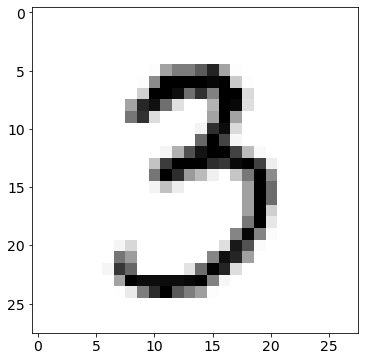

In [6]:
fig = plt.figure( figsize=(6,6) )
plt.imshow( X_train_raw[ idx ].reshape(28,28), cmap='binary' )

In [7]:
# Cria uma máscara booleana que identifica as amostras cujo rótulo é 3 no conjunto de treino.
msk_train_3 = (y_train == 3)

# Cria uma cópia dos rótulos originais do treino para modificar sem afetar o vetor original.
y_train_clf_3 = y_train.copy()

# Define as amostras da classe 3 como 1 (positivas) na tarefa de classificação binária.
y_train_clf_3[msk_train_3] = 1

# Define todas as demais amostras (não-3) como 0 (negativas).
y_train_clf_3[~msk_train_3] = 0

# Imprime os rótulos da classe positiva (os que eram 3), confirmando que todos foram convertidos para 1.
print(y_train_clf_3[msk_train_3])

# Imprime os rótulos das outras classes, confirmando que todos foram convertidos para 0.
print(y_train_clf_3[~msk_train_3])

# Cria um índice aleatório (permuta aleatória) para embaralhar os dados de treino.
shuffle_index = np.random.permutation(60000)

# Aplica o embaralhamento aos dados e rótulos do treino binarizado.
X_train_shuffle = X_train[shuffle_index]
y_train_shuffle = y_train_clf_3[shuffle_index]

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


In [8]:
# Importa o módulo de modelos lineares da biblioteca scikit-learn.
from sklearn import linear_model

# Cria uma instância do modelo de regressão logística.
# O parâmetro max_iter=1000000 define o número máximo de iterações permitidas para o otimizador convergir.
# Esse valor alto é usado para garantir que o modelo consiga convergir mesmo em conjuntos de dados grandes como o MNIST.
log_reg = linear_model.LogisticRegression(max_iter=1000000)

# Treina o modelo de regressão logística usando os dados embaralhados do conjunto de treino
# e os rótulos binarizados (1 para dígito 3, 0 para os demais).
log_reg.fit(X_train_shuffle, y_train_shuffle)

LogisticRegression(max_iter=1000000)

[0.01023327 0.98381795]
Label: 0
Pred.: 0.010233267666801792
Label: 1
Pred.: 0.9838179503306679


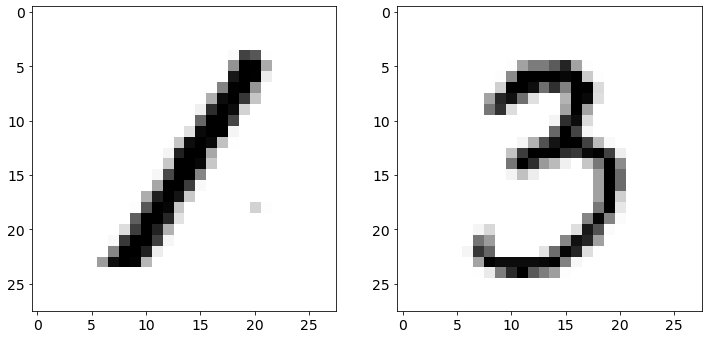

In [9]:
idx_list = [ 10000, 20000 ]

fig, axes = plt.subplots( 1, 2, figsize=(12,6) )

y_predict_proba = log_reg.predict_proba( X_train[ idx_list ] )[ :, 1 ]
print ( y_predict_proba )

for idx_, idx_data_ in enumerate( idx_list ):
    print ( "Label: {}".format( y_train_clf_3[ idx_data_ ] ) )
    print ( "Pred.: {}".format( y_predict_proba[ idx_ ] ) )
    axes[ idx_ ].imshow( X_train_raw[ idx_data_ ].reshape(28,28), cmap='binary' )

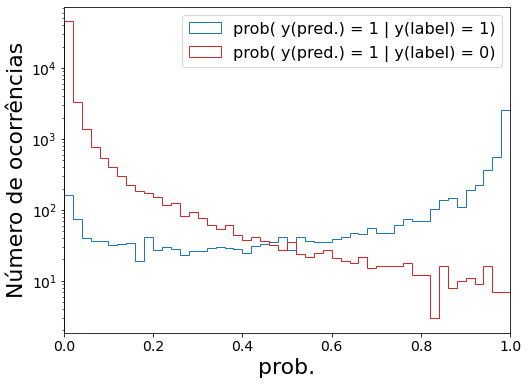

In [10]:
# Gera as probabilidades previstas pelo modelo de regressão logística no conjunto de treino.
# A função predict_proba retorna uma matriz com duas colunas: a primeira para a probabilidade da classe 0 (não-3),
# e a segunda para a classe 1 (dígito 3). Aqui selecionamos apenas a coluna da classe 1.
y_predict_proba_train = log_reg.predict_proba(X_train)[:, 1]

# Cria uma nova figura para o gráfico com tamanho 8x6 polegadas.
fig = plt.figure(figsize=(8,6))

# Plota um histograma das probabilidades previstas para as amostras positivas (rótulo real = 3).
# Ou seja, P(y_pred = 1 | y_real = 1), em azul. Usa contornos ('step') ao invés de barras preenchidas.
plt.hist(y_predict_proba_train[msk_train_3], 
         histtype='step', 
         color="tab:blue", 
         label="prob( y(pred.) = 1 | y(label) = 1)", 
         bins=50, 
         range=(0.,1.))

# Plota um histograma das probabilidades previstas para as amostras negativas (rótulo real ≠ 3).
# Ou seja, P(y_pred = 1 | y_real = 0), em vermelho.
plt.hist(y_predict_proba_train[~msk_train_3], 
         histtype='step', 
         color="tab:red", 
         label="prob( y(pred.) = 1 | y(label) = 0)", 
         bins=50, 
         range=(0.,1.))

# Adiciona legenda no melhor local automaticamente.
plt.legend(loc='best')

# Limita o eixo x ao intervalo de probabilidade [0, 1].
plt.xlim(0., 1.)

# Define os rótulos dos eixos.
plt.xlabel("prob.")                    # Eixo x: probabilidade prevista
plt.ylabel("Número de ocorrências")   # Eixo y: contagem de exemplos

# Define a escala do eixo y como logarítmica para melhor visualizar diferenças entre classes.
plt.yscale('log')

In [11]:
# Cria uma máscara booleana para o conjunto de teste, identificando quais amostras são do dígito 3.
msk_test_3 = (y_test == 3)

# Cria uma cópia dos rótulos originais do conjunto de teste para transformá-los em uma tarefa binária.
y_test_clf_3 = y_test.copy()

# Define os rótulos das amostras cujo valor é 3 como 1 (classe positiva).
y_test_clf_3[msk_test_3] = 1

# Define os rótulos das demais amostras (diferentes de 3) como 0 (classe negativa).
y_test_clf_3[~msk_test_3] = 0

# Imprime os rótulos das amostras positivas (deverão ser todos 1).
print(y_test_clf_3[msk_test_3])

# Imprime os rótulos das amostras negativas (deverão ser todos 0).
print(y_test_clf_3[~msk_test_3])

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


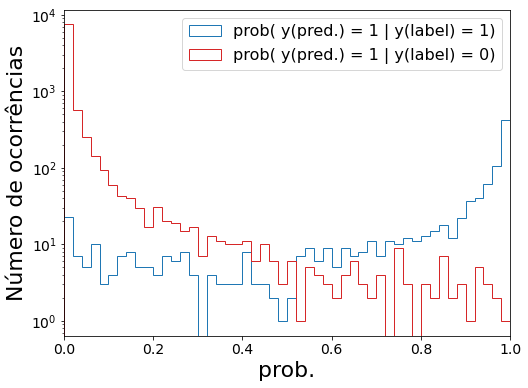

In [12]:
# Gera as probabilidades previstas pelo modelo de regressão logística no conjunto de teste.
# A função predict_proba retorna uma matriz com duas colunas: a primeira para a probabilidade da classe 0 (não-3),
# e a segunda para a classe 1 (dígito 3). Aqui selecionamos apenas a coluna da classe 1.
y_predict_proba_test = log_reg.predict_proba(X_test)[:, 1]

# Cria uma nova figura para o gráfico com tamanho 8x6 polegadas.
fig = plt.figure(figsize=(8,6))

# Plota um histograma das probabilidades previstas para as amostras positivas (rótulo real = 3) no conjunto de teste.
# Ou seja, P(y_pred = 1 | y_real = 1), em azul. Usa contornos ('step') ao invés de barras preenchidas.
plt.hist(y_predict_proba_test[msk_test_3], 
         histtype='step', 
         color="tab:blue", 
         label="prob( y(pred.) = 1 | y(label) = 1)", 
         bins=50, 
         range=(0.,1.))

# Plota um histograma das probabilidades previstas para as amostras negativas (rótulo real ≠ 3) no conjunto de teste.
# Ou seja, P(y_pred = 1 | y_real = 0), em vermelho.
plt.hist(y_predict_proba_test[~msk_test_3], 
         histtype='step', 
         color="tab:red", 
         label="prob( y(pred.) = 1 | y(label) = 0)", 
         bins=50, 
         range=(0.,1.))

# Adiciona legenda no melhor local automaticamente.
plt.legend(loc='best')

# Limita o eixo x ao intervalo de probabilidade [0, 1].
plt.xlim(0., 1.)

# Define os rótulos dos eixos.
plt.xlabel("prob.")                    # Eixo x: probabilidade prevista
plt.ylabel("Número de ocorrências")   # Eixo y: contagem de exemplos

# Define a escala do eixo y como logarítmica para melhor visualizar diferenças entre classes.
plt.yscale('log')

In [13]:
# Define o corte da probabilidade para classificar uma amostra como pertencente à classe 1 (dígito 3).
# Aqui, estamos usando 0.50 como limiar: se a probabilidade prevista for maior ou igual a 0.50, a amostra será classificada como 1.
prob_cut = 0.50

# Inicializa o vetor de previsões (y_predict_test) com -1, que indica um valor inválido ou não atribuído.
y_predict_test = np.full_like(y_predict_proba_test, -1)

# Cria uma máscara booleana que identifica as amostras para as quais a probabilidade prevista é maior ou igual a 0.50.
msk_prob_cut = (y_predict_proba_test >= prob_cut)

# Define as previsões para as amostras com probabilidade maior ou igual a 0.50 como classe 1 (dígito 3).
y_predict_test[msk_prob_cut] = 1

# Define as previsões para as amostras com probabilidade menor que 0.50 como classe 0 (não dígito 3).
y_predict_test[~msk_prob_cut] = 0

# Calcula a acurácia, comparando as previsões (y_predict_test) com os rótulos reais binarizados do conjunto de teste (y_test_clf_3).
# A acurácia é a fração de previsões corretas.
accuracy = np.sum(y_predict_test == y_test_clf_3) / y_test_clf_3.size

# Imprime a acurácia do modelo no conjunto de teste.
print("Accuracy = {}".format(accuracy))

Accuracy = 0.9783


[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11234705e-04
 1.11234705e-04 2.22469410e-04 2.22469410e-04 3.33704116e-04
 3.33704116e-04 4.44938821e-04 4.44938821e-04 5.56173526e-04
 5.56173526e-04 6.67408231e-04 6.67408231e-04 7.78642937e-04
 7.78642937e-04 8.89877642e-04 8.89877642e-04 1.11234705e-03
 1.11234705e-03 1.22358176e-03 1.22358176e-03 1.33481646e-03
 1.33481646e-03 1.55728587e-03 1.55728587e-03 1.66852058e-03
 1.66852058e-03 1.77975528e-03 1.77975528e-03 1.89098999e-03
 1.89098999e-03 2.00222469e-03 2.00222469e-03 2.22469410e-03
 2.22469410e-03 2.66963293e-03 2.66963293e-03 2.78086763e-03
 2.78086763e-03 2.89210234e-03 2.89210234e-03 3.00333704e-03
 3.00333704e-03 3.11457175e-03 3.11457175e-03 3.22580645e-03
 3.22580645e-03 3.33704116e-03 3.33704116e-03 3.44827586e-03
 3.44827586e-03 3.55951057e-03 3.55951057e-03 3.67074527e-03
 3.67074527e-03 3.89321468e-03 3.89321468e-03 4.00444939e-03
 4.00444939e-03 4.33815350e-03 4.33815350e-03 4.44938821e-03
 4.44938821e-03 4.560622

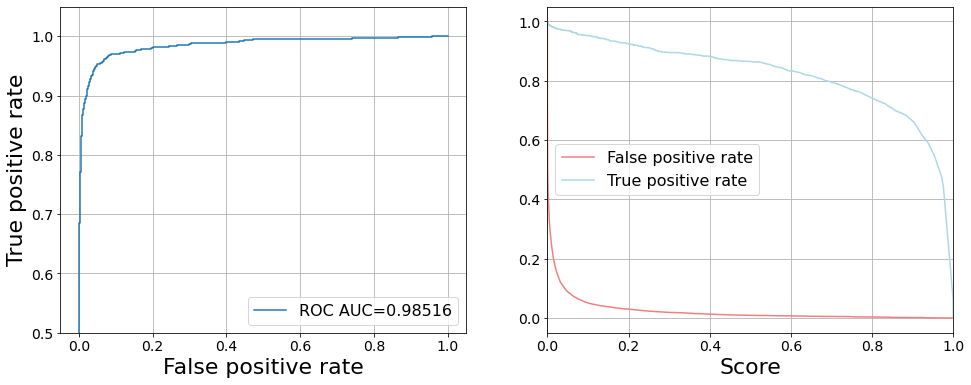

In [14]:
# Importa as funções necessárias para calcular a curva ROC e a AUC.
from sklearn.metrics import roc_curve, roc_auc_score

# Calcula a curva ROC (fpr, tpr) e os limiares associados (thresholds) usando as probabilidades previstas e os rótulos reais.
# fpr = taxa de falsos positivos
# tpr = taxa de verdadeiros positivos
# thresholds = diferentes limiares para classificar a amostra como positiva (classe 1)
fpr, tpr, thresholds = roc_curve(y_test_clf_3, y_predict_proba_test)

# Calcula o AUC (Área sob a Curva ROC), que é uma medida da capacidade do modelo de distinguir entre as classes.
auc = roc_auc_score(y_test_clf_3, y_predict_proba_test)

# Imprime os valores de fpr, tpr e thresholds para inspecionar.
print(fpr, tpr, thresholds)

# Cria uma figura com dois subgráficos lado a lado para exibir a curva ROC e a relação entre taxa de falsos positivos e verdadeira.
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Plota a curva ROC no primeiro gráfico (axes[0]) e exibe o AUC no título.
axes[0].plot(fpr, tpr, label="ROC AUC={:.5f}".format(auc))
axes[0].legend(loc='best')  # Exibe a legenda no melhor local.
axes[0].set_xlabel('False positive rate')  # Rótulo do eixo x
axes[0].set_ylabel('True positive rate')   # Rótulo do eixo y
axes[0].set_ylim(0.50, 1.05)  # Limita o eixo y para melhorar a visualização
axes[0].grid()  # Ativa o grid no gráfico

# Plota as taxas de falsos positivos e verdadeiros positivos contra os limiares no segundo gráfico (axes[1]).
axes[1].plot(thresholds, fpr, label='False positive rate', color='lightcoral')
axes[1].plot(thresholds, tpr, label='True positive rate', color='lightblue')
axes[1].legend(loc='best')  # Exibe a legenda no melhor local.
axes[1].set_xlabel('Score')  # Rótulo do eixo x
axes[1].set_xlim(0., 1.)  # Limita o eixo x para o intervalo [0, 1]
axes[1].grid()  # Ativa o grid no gráfico

In [15]:
# Embaralha o conjunto de treinamento criando um índice aleatório.
# np.random.permutation gera um vetor de índices de 0 a 59999 de forma embaralhada.
shuffle_index = np.random.permutation(60000)

# Aplica o embaralhamento aos dados de entrada (X_train) e aos rótulos (y_train)
# O conjunto embaralhado de dados é armazenado em X_train_shuffle_multi e y_train_shuffle_multi.
X_train_shuffle_multi, y_train_shuffle_multi = X_train[shuffle_index], y_train[shuffle_index]

# Cria um modelo de regressão logística para classificação multiclasse usando o método "multinomial".
# A opção 'multinomial' permite que a regressão logística seja usada para problemas de múltiplas classes (não apenas binário).
# max_iter=1000000 é definido para garantir que o algoritmo de otimização tenha tempo suficiente para convergir.
softmax_reg = linear_model.LogisticRegression(multi_class='multinomial', max_iter=1000000)

# Treina o modelo usando os dados de treinamento embaralhados.
# O modelo ajusta seus coeficientes para prever os rótulos (y_train_shuffle_multi) a partir das características (X_train_shuffle_multi).
softmax_reg.fit(X_train_shuffle_multi, y_train_shuffle_multi)

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000000, multi_class='multinomial')

Label: 1
Prob.: [1.53935471e-08 9.96624039e-01 2.55003862e-03 9.68456684e-05
 4.19926490e-07 2.39197462e-06 2.34699073e-07 9.54176925e-08
 7.25256717e-04 6.62632437e-07]
Pred.: 1
Label: 3
Prob.: [7.52961611e-07 1.05030097e-07 1.57731902e-05 9.96760462e-01
 3.91044488e-07 2.33708070e-03 4.05565688e-12 6.69242821e-06
 3.68899580e-04 5.09843544e-04]
Pred.: 3


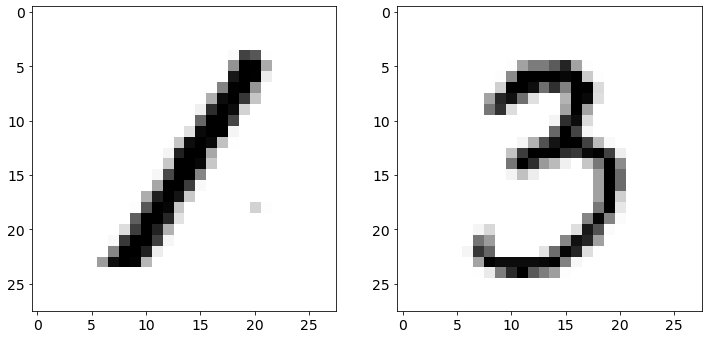

In [16]:
# Lista de índices para as amostras do conjunto de treinamento que serão usadas para visualização.
# Neste caso, estamos usando os índices 10000 e 20000, mas podem ser alterados para quaisquer outros.
idx_list = [10000, 20000]
# Caso o código deva usar outros índices, a linha acima pode ser modificada, como exemplo, para [15000, 40000].

# Cria uma figura com dois subgráficos, lado a lado, para mostrar os resultados de cada amostra.
# A figura terá tamanho 12x6 polegadas.
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Obtém as probabilidades de predição para cada amostra dos índices fornecidos, usando o modelo de regressão logística treinado.
# O método predict_proba retorna as probabilidades de cada classe para as amostras fornecidas.
y_predict_proba_multi = softmax_reg.predict_proba( X_train[ idx_list ] )

# Faz a predição de classe para as amostras dos índices fornecidos.
# O método predict retorna a classe de maior probabilidade para cada amostra.
y_predict_multi = softmax_reg.predict( X_train[ idx_list ] )

# Laço que itera sobre os índices fornecidos na lista `idx_list` para mostrar as predições e as imagens correspondentes.
for idx_, idx_data_ in enumerate( idx_list ):
    # Imprime o rótulo real da amostra (o valor verdadeiro de y_train para o índice dado).
    print("Label: {}".format( y_train[ idx_data_ ] ))
    
    # Imprime as probabilidades preditas para cada classe para a amostra do índice `idx_`.
    print("Prob.: {}".format( y_predict_proba_multi[ idx_ ] ))
    
    # Imprime a classe predita (a classe de maior probabilidade) para a amostra do índice `idx_`.
    print("Pred.: {}".format( y_predict_multi[ idx_ ] ))
    
    # Exibe a imagem correspondente à amostra do índice `idx_data_` usando o matplotlib, com o cmap 'binary' para visualização em escala de cinza.
    axes[ idx_ ].imshow( X_train_raw[ idx_data_ ].reshape(28,28), cmap='binary' )

In [17]:
# Faz a predição das classes para todas as amostras do conjunto de teste usando o modelo de regressão logística multinomial.
# O método `predict` retorna as classes preditas para cada amostra.
y_predict_test_multi = softmax_reg.predict( X_test )

# Calcula a acurácia, que é a proporção de predições corretas em relação ao total de amostras no conjunto de teste.
# A acurácia é obtida comparando as predições com os rótulos reais e dividindo pelo número total de amostras.
accuracy = np.sum( y_predict_test_multi == y_test ) / y_test.size

# Exibe o valor da acurácia.
print("Accuracy = {}".format( accuracy ))

Accuracy = 0.9214


786
0: 31
1: 26
2: 115
3: 91
4: 68
5: 119
6: 48
7: 85
8: 117
9: 86


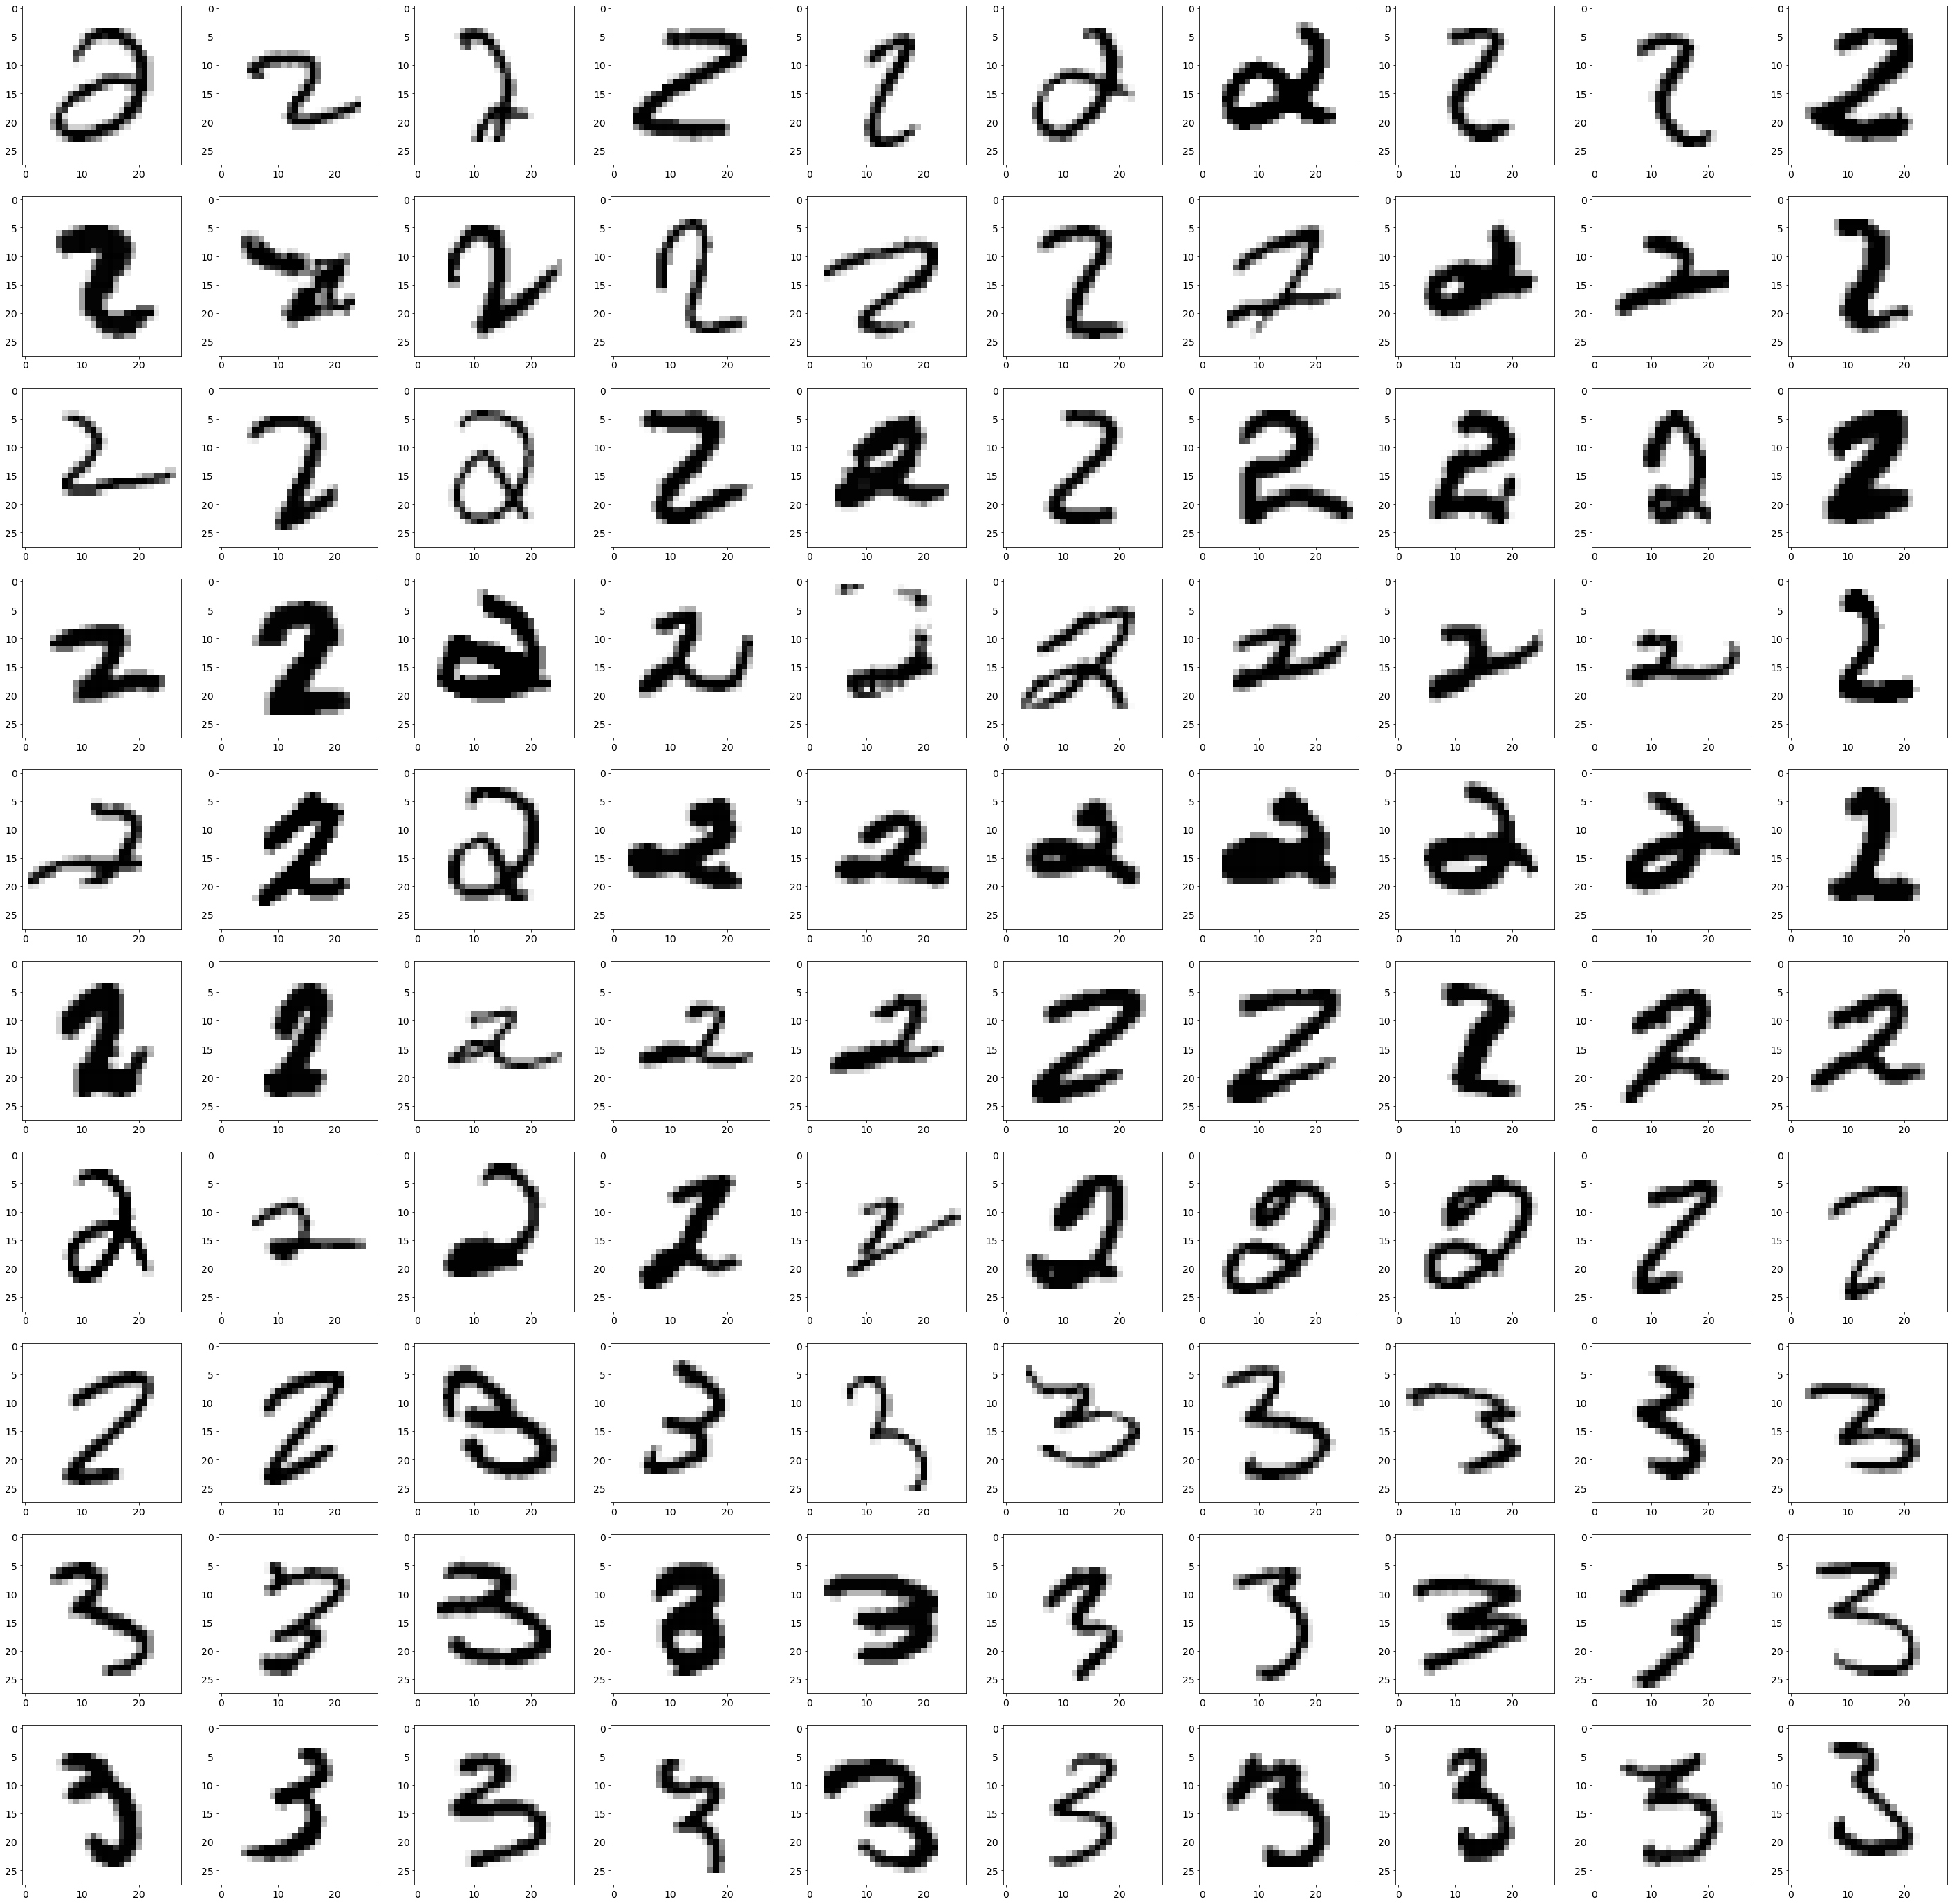

In [18]:
# Função que plota as imagens dos dígitos do conjunto de dados X em uma grade, 
# com n imagens a partir de um índice start.
def plot_digits( X, n, start = 0 ):
    # Define o número de imagens por linha na grade.
    n_per_row_ = 10
    # Calcula o número de linhas necessárias para exibir todas as imagens.
    n_rows_ = int( ( n / n_per_row_  ) if ( n % n_per_row_ ) == 0 else ( ( n // n_per_row_ ) + 1 ) )
    # Define o tamanho das imagens na grade.
    size_ = 5
    # Cria o objeto de figura e os eixos para a grade de subplots.
    fig_, axes_ = plt.subplots( n_rows_, n_per_row_, figsize=( n_per_row_ * size_ , n_rows_ * size_ ) )
    # Inicializa os índices de linha e coluna para percorrer a grade.
    idx_row_, idx_col_ = 0, 0
    # Loop para iterar pelas imagens e plotá-las nos subplots.
    for idx__ in range( n ):
        # Para cada imagem, escolhe o eixo correspondente.
        ax_ = axes_[ idx_row_, idx_col_ ]
        # Exibe a imagem no eixo atual, remodelando para 28x28 pixels.
        ax_.imshow( X[ start+idx__ ].reshape(28,28), cmap='binary' )
        # Avança para a próxima coluna.
        idx_col_ += 1
        # Se alcançou o número de colunas por linha, move para a próxima linha.
        if idx_col_ % n_per_row_ == 0:
            idx_row_ += 1
            idx_col_  = 0

# Cria uma máscara de erro, onde as predições são diferentes dos rótulos reais no conjunto de teste.
msk_error_ = y_predict_test_multi != y_test
# Imprime o número total de erros (diferenças entre predições e rótulos reais).
print ( np.sum( msk_error_ ) )

# Para cada dígito de 0 a 9, conta quantos erros ocorreram para aquele dígito específico.
for label_ in range( 10 ):
    msk__ = msk_error_ & ( y_test == label_ )
    print ( "{}: {}".format( label_, np.sum( msk__ ) ) )

# Plota as primeiras 100 imagens do conjunto de teste que foram classificadas incorretamente, 
# começando a partir do índice 100.
plot_digits( X_test_raw[ msk_error_ ], 100, 100 )

# Exercício:

### Implemente a classificação dos dígitos (primeiramente classificação binária) usando outros classificadores lineares e compare a sua performance.

In [19]:
# Testando uma regressão linear.

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train_shuffle, y_train_shuffle) # treinando com os dados gerais onde o 3 = 1 ("sinal") 
                                                 # e resto como ("background") dados estão embaralhados

LinearRegression()

In [20]:
linear_pred = linear_reg.predict(X_test)   # prevendo com os dados de teste

print(linear_pred)
print(y_test)

linear_pred_bin = (linear_pred > 0.5).astype(int) # colocando criterio de > 0.5 é um 3 e menor é qualquer coisa
y_test_bin = (y_test == 3).astype(int)  # mesma coisa só que = 3 vai ser 1 (signal)

[-0.04417064  0.14123084 -0.0365932  ... -0.07791092 -0.1017423
 -0.01848932]
[0 0 0 ... 9 9 9]


In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(linear_pred_bin, y_test_bin)
print(f"Acurácia do classificador linear: {accuracy:.4f}")

Acurácia do classificador linear: 0.9601


In [24]:
# Testando usando um perceptron

import numpy as np

# Definição da classe Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Taxa de aprendizado
        self.lr = learning_rate
        # Número de épocas (iterações sobre o conjunto de dados)
        self.epochs = epochs
        # Função de ativação: aqui usamos a função degrau unitária
        self.activation_func = self._unit_step_func
        # Inicialização dos pesos (serão definidos no método fit)
        self.weights = None

    def fit(self, X, y):
        # Obtém o número de amostras e de características
        n_samples, n_features = X.shape

        # Adiciona uma coluna de 1s a X para representar o bias (viés)
        X_ = np.c_[ np.ones( X.shape[0] ), X ]

        # Garante que os rótulos estejam no formato 0 ou 1
        y_ = np.array( [ 1 if y_ > 0 else 0 for y_ in y ] )

        # Inicializa os pesos com zeros, incluindo o peso do bias
        self.weights = np.zeros( X_.shape[1] )

        # Loop principal de treinamento, repetido por 'epochs'
        for _ in range( self.epochs ):
            # Itera sobre cada amostra do conjunto de treinamento
            for idx, x_i in enumerate( X_ ):
                # Calcula a saída linear (produto escalar dos pesos com as entradas)
                linear_output = np.dot( x_i, self.weights )
                # Aplica a função de ativação para obter a saída binária (0 ou 1)
                y_predicted = self.activation_func( linear_output )

                # Calcula a atualização do peso com base no erro
                update = self.lr * ( y_[idx] - y_predicted )

                # Atualiza os pesos proporcionalmente ao erro
                self.weights += update * x_i

    def predict(self, X):
        # Adiciona a coluna do bias ao conjunto de dados de entrada
        X_ = np.c_[ np.ones( X.shape[0] ), X ]

        # Calcula a saída linear
        linear_output = np.dot( X_, self.weights )
        # Aplica a função de ativação para obter a previsão (0 ou 1)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # Função de ativação: degrau unitário
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [25]:
p = Perceptron(learning_rate=0.01, epochs=100)
p.fit(X_train_shuffle, y_train_shuffle)

In [26]:
perceptron_pred = p.predict(X_test)
y_test_bin = (y_test == 3).astype(int)


accuracy = accuracy_score(perceptron_pred, y_test_bin)
print(f"Acurácia do classificador perceptron: {accuracy:.4f}")

Acurácia do classificador perceptron: 0.9633
